In [310]:
print("HI")

HI


In [311]:
import pandas as pd
import numpy as np
import re
df=pd.read_csv("raw_property.csv")
df

,Property_Name,Location,Price,Rate_SqFt,Area_Tpye,Bedroom,Bathroom,Floor_No,Property_Age,Availability
0,Omkar Alta Monte,"W.E.Highway, Malad East, Mumbai",5 Crore,"17,241",Super Built up area 2900(269.42 sq.m.)Built Up...,3,4,14th,0 to 1 Year Old,Ready to move
1,T Bhimjyani Neelkanth Woods,"Manpada, Thane, Mumbai",2.4 Crore,"12,631",Super Built up area 1900(176.52 sq.m.)Built Up...,3,3,8th,1 to 5 Year Old,Ready to move Property
2,Legend 1 Pramila Nagar,"Dahisar West, Mumbai",95 Lac,"15,966",Super Built up area 595(55.28 sq.m.),1,2,3rd,10+ Year Old,Ready to move
3,Unnamed Property,"Vidyavihar West, Vidyavihar West, Central Mumb...",3.75 Crore,"25,862",Built Up area: 1450 (134.71 sq.m.),3,3,1st,5 to 10 Year Old,Ready to move
4,Unnamed Property,"176 Cst Road, Kalina, Mumbai 400098, Santacruz...",3.5 Crore,"39,954",Carpet area: 876 (81.38 sq.m.),2,2,5th,5 to 10 Year Old,Ready to move
...,...,...,...,...,...,...,...,...,...,...
2576,Shagun White Woods,"Sector 23 Ulwe, Navi-Mumbai, Mumbai",1.22 Crore,"10,338",Built Up area: 1180 (109.63 sq.m.),2,2,2nd,1 to 5 Year Old,Ready to move
2577,Guru Anant,"Sector 2 Ulwe, Navi-Mumbai, Mumbai",88 Lac,"8,073",Built Up area: 1090 (101.26 sq.m.),2,2,11st,0 to 1 Year Old,Ready to move
2578,Balaji Mayuresh Delta,"Ulwe, Navi-Mumbai, Mumbai",1.37 Crore,"10,579",Built Up area: 1295 (120.31 sq.m.),2,2,6th,1 to 5 Year Old,Ready to move
2579,Balaji Mayuresh Delta,"Ulwe, Navi-Mumbai, Mumbai",1.71 Crore,"9,243",Built Up area: 1850 (171.87 sq.m.),3,3,6th,1 to 5 Year Old,Ready to move


In [312]:
#Data Cleaning
def clean_price(price):
    if isinstance(price, str):
        price = price.replace(',', '').strip()
        if 'Crore' in price:
            return float(price.split()[0]) * 100  # Crore to Lakhs
        if 'Lakh' in price:
            return float(price.split()[0])  # Already in Lakhs
        try:
            return float(price)
        except ValueError:
            return None  
    return price



In [313]:
df['Price'] = df['Price'].apply(clean_price)
df.head()

,Property_Name,Location,Price,Rate_SqFt,Area_Tpye,Bedroom,Bathroom,Floor_No,Property_Age,Availability
0,Omkar Alta Monte,"W.E.Highway, Malad East, Mumbai",500.00,"17,241",Super Built up area 2900(269.42 sq.m.)Built Up...,3,4,14th,0 to 1 Year Old,Ready to move
1,T Bhimjyani Neelkanth Woods,"Manpada, Thane, Mumbai",240.00,"12,631",Super Built up area 1900(176.52 sq.m.)Built Up...,3,3,8th,1 to 5 Year Old,Ready to move Property
2,Legend 1 Pramila Nagar,"Dahisar West, Mumbai",NaN,"15,966",Super Built up area 595(55.28 sq.m.),1,2,3rd,10+ Year Old,Ready to move
3,Unnamed Property,"Vidyavihar West, Vidyavihar West, Central Mumb...",375.00,"25,862",Built Up area: 1450 (134.71 sq.m.),3,3,1st,5 to 10 Year Old,Ready to move
4,Unnamed Property,"176 Cst Road, Kalina, Mumbai 400098, Santacruz...",350.00,"39,954",Carpet area: 876 (81.38 sq.m.),2,2,5th,5 to 10 Year Old,Ready to move


In [314]:
def extract_area(area_str):
    if pd.isna(area_str):
        return np.nan
    # Look for carpet area first
    carpet_match = re.search(r'Carpet area: (\d+)', area_str)
    if carpet_match:
        return float(carpet_match.group(1))
    # Then built-up area
    built_match = re.search(r'Built Up area: (\d+)', area_str)
    if built_match:
        return float(built_match.group(1))
    # Then super built-up area
    super_match = re.search(r'Super Built up area (\d+)', area_str)
    if super_match:
        return float(super_match.group(1))
    # Then plot area
    plot_match = re.search(r'Plot area (\d+)', area_str)
    if plot_match:
        return float(plot_match.group(1))
    return np.nan
    
df['Area_SqFt'] = df['Area_Tpye'].apply(extract_area)
df.head()
# Priority order: Carpet > Built-up > Super Built-up > Plot

,Property_Name,Location,Price,Rate_SqFt,Area_Tpye,Bedroom,Bathroom,Floor_No,Property_Age,Availability,Area_SqFt
0,Omkar Alta Monte,"W.E.Highway, Malad East, Mumbai",500.00,"17,241",Super Built up area 2900(269.42 sq.m.)Built Up...,3,4,14th,0 to 1 Year Old,Ready to move,1833.00
1,T Bhimjyani Neelkanth Woods,"Manpada, Thane, Mumbai",240.00,"12,631",Super Built up area 1900(176.52 sq.m.)Built Up...,3,3,8th,1 to 5 Year Old,Ready to move Property,1200.00
2,Legend 1 Pramila Nagar,"Dahisar West, Mumbai",NaN,"15,966",Super Built up area 595(55.28 sq.m.),1,2,3rd,10+ Year Old,Ready to move,595.00
3,Unnamed Property,"Vidyavihar West, Vidyavihar West, Central Mumb...",375.00,"25,862",Built Up area: 1450 (134.71 sq.m.),3,3,1st,5 to 10 Year Old,Ready to move,1450.00
4,Unnamed Property,"176 Cst Road, Kalina, Mumbai 400098, Santacruz...",350.00,"39,954",Carpet area: 876 (81.38 sq.m.),2,2,5th,5 to 10 Year Old,Ready to move,876.00


In [315]:
def clean_rate(rate):
    if isinstance(rate, str):
        rate = rate.replace(',', '').replace(' ', '')
        return float(rate) if rate else np.nan
    return rate
df['Rate_SqFt'] = df['Rate_SqFt'].apply(clean_rate) 
df

,Property_Name,Location,Price,Rate_SqFt,Area_Tpye,Bedroom,Bathroom,Floor_No,Property_Age,Availability,Area_SqFt
0,Omkar Alta Monte,"W.E.Highway, Malad East, Mumbai",500.00,17241.00,Super Built up area 2900(269.42 sq.m.)Built Up...,3,4,14th,0 to 1 Year Old,Ready to move,1833.00
1,T Bhimjyani Neelkanth Woods,"Manpada, Thane, Mumbai",240.00,12631.00,Super Built up area 1900(176.52 sq.m.)Built Up...,3,3,8th,1 to 5 Year Old,Ready to move Property,1200.00
2,Legend 1 Pramila Nagar,"Dahisar West, Mumbai",NaN,15966.00,Super Built up area 595(55.28 sq.m.),1,2,3rd,10+ Year Old,Ready to move,595.00
3,Unnamed Property,"Vidyavihar West, Vidyavihar West, Central Mumb...",375.00,25862.00,Built Up area: 1450 (134.71 sq.m.),3,3,1st,5 to 10 Year Old,Ready to move,1450.00
4,Unnamed Property,"176 Cst Road, Kalina, Mumbai 400098, Santacruz...",350.00,39954.00,Carpet area: 876 (81.38 sq.m.),2,2,5th,5 to 10 Year Old,Ready to move,876.00
...,...,...,...,...,...,...,...,...,...,...,...
2576,Shagun White Woods,"Sector 23 Ulwe, Navi-Mumbai, Mumbai",122.00,10338.00,Built Up area: 1180 (109.63 sq.m.),2,2,2nd,1 to 5 Year Old,Ready to move,1180.00
2577,Guru Anant,"Sector 2 Ulwe, Navi-Mumbai, Mumbai",NaN,8073.00,Built Up area: 1090 (101.26 sq.m.),2,2,11st,0 to 1 Year Old,Ready to move,1090.00
2578,Balaji Mayuresh Delta,"Ulwe, Navi-Mumbai, Mumbai",137.00,10579.00,Built Up area: 1295 (120.31 sq.m.),2,2,6th,1 to 5 Year Old,Ready to move,1295.00
2579,Balaji Mayuresh Delta,"Ulwe, Navi-Mumbai, Mumbai",171.00,9243.00,Built Up area: 1850 (171.87 sq.m.),3,3,6th,1 to 5 Year Old,Ready to move,1850.00


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  2581 non-null   object 
 1   Location       2581 non-null   object 
 2   Price          1447 non-null   float64
 3   Rate_SqFt      2581 non-null   float64
 4   Area_Tpye      2581 non-null   object 
 5   Bedroom        2581 non-null   int64  
 6   Bathroom       2581 non-null   int64  
 7   Floor_No       2581 non-null   object 
 8   Property_Age   2581 non-null   object 
 9   Availability   2581 non-null   object 
 10  Area_SqFt      2581 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 221.9+ KB


In [317]:
df['Property_Age'] = df['Property_Age'].str.replace('Old', '').str.strip()
df.head()

,Property_Name,Location,Price,Rate_SqFt,Area_Tpye,Bedroom,Bathroom,Floor_No,Property_Age,Availability,Area_SqFt
0,Omkar Alta Monte,"W.E.Highway, Malad East, Mumbai",500.00,17241.00,Super Built up area 2900(269.42 sq.m.)Built Up...,3,4,14th,0 to 1 Year,Ready to move,1833.00
1,T Bhimjyani Neelkanth Woods,"Manpada, Thane, Mumbai",240.00,12631.00,Super Built up area 1900(176.52 sq.m.)Built Up...,3,3,8th,1 to 5 Year,Ready to move Property,1200.00
2,Legend 1 Pramila Nagar,"Dahisar West, Mumbai",NaN,15966.00,Super Built up area 595(55.28 sq.m.),1,2,3rd,10+ Year,Ready to move,595.00
3,Unnamed Property,"Vidyavihar West, Vidyavihar West, Central Mumb...",375.00,25862.00,Built Up area: 1450 (134.71 sq.m.),3,3,1st,5 to 10 Year,Ready to move,1450.00
4,Unnamed Property,"176 Cst Road, Kalina, Mumbai 400098, Santacruz...",350.00,39954.00,Carpet area: 876 (81.38 sq.m.),2,2,5th,5 to 10 Year,Ready to move,876.00


In [318]:
# Clean location - extract main locality
def extract_locality(location):
    parts = location.split(',')
    if len(parts) >= 2:
        return parts[-2].strip()
    return location

df['Locality'] = df['Location'].apply(extract_locality)
df.head()

,Property_Name,Location,Price,Rate_SqFt,Area_Tpye,Bedroom,Bathroom,Floor_No,Property_Age,Availability,Area_SqFt,Locality
0,Omkar Alta Monte,"W.E.Highway, Malad East, Mumbai",500.00,17241.00,Super Built up area 2900(269.42 sq.m.)Built Up...,3,4,14th,0 to 1 Year,Ready to move,1833.00,Malad East
1,T Bhimjyani Neelkanth Woods,"Manpada, Thane, Mumbai",240.00,12631.00,Super Built up area 1900(176.52 sq.m.)Built Up...,3,3,8th,1 to 5 Year,Ready to move Property,1200.00,Thane
2,Legend 1 Pramila Nagar,"Dahisar West, Mumbai",NaN,15966.00,Super Built up area 595(55.28 sq.m.),1,2,3rd,10+ Year,Ready to move,595.00,Dahisar West
3,Unnamed Property,"Vidyavihar West, Vidyavihar West, Central Mumb...",375.00,25862.00,Built Up area: 1450 (134.71 sq.m.),3,3,1st,5 to 10 Year,Ready to move,1450.00,Central Mumbai suburbs
4,Unnamed Property,"176 Cst Road, Kalina, Mumbai 400098, Santacruz...",350.00,39954.00,Carpet area: 876 (81.38 sq.m.),2,2,5th,5 to 10 Year,Ready to move,876.00,Mumbai South West


In [319]:
# Handle missing property names
df['Property_Name'] = df['Property_Name'].fillna('Unknown')
df.head()

,Property_Name,Location,Price,Rate_SqFt,Area_Tpye,Bedroom,Bathroom,Floor_No,Property_Age,Availability,Area_SqFt,Locality
0,Omkar Alta Monte,"W.E.Highway, Malad East, Mumbai",500.00,17241.00,Super Built up area 2900(269.42 sq.m.)Built Up...,3,4,14th,0 to 1 Year,Ready to move,1833.00,Malad East
1,T Bhimjyani Neelkanth Woods,"Manpada, Thane, Mumbai",240.00,12631.00,Super Built up area 1900(176.52 sq.m.)Built Up...,3,3,8th,1 to 5 Year,Ready to move Property,1200.00,Thane
2,Legend 1 Pramila Nagar,"Dahisar West, Mumbai",NaN,15966.00,Super Built up area 595(55.28 sq.m.),1,2,3rd,10+ Year,Ready to move,595.00,Dahisar West
3,Unnamed Property,"Vidyavihar West, Vidyavihar West, Central Mumb...",375.00,25862.00,Built Up area: 1450 (134.71 sq.m.),3,3,1st,5 to 10 Year,Ready to move,1450.00,Central Mumbai suburbs
4,Unnamed Property,"176 Cst Road, Kalina, Mumbai 400098, Santacruz...",350.00,39954.00,Carpet area: 876 (81.38 sq.m.),2,2,5th,5 to 10 Year,Ready to move,876.00,Mumbai South West


In [320]:
df = df.drop(['Area_Tpye', 'Location'], axis=1)

In [321]:
df.head()

,Property_Name,Price,Rate_SqFt,Bedroom,Bathroom,Floor_No,Property_Age,Availability,Area_SqFt,Locality
0,Omkar Alta Monte,500.00,17241.00,3,4,14th,0 to 1 Year,Ready to move,1833.00,Malad East
1,T Bhimjyani Neelkanth Woods,240.00,12631.00,3,3,8th,1 to 5 Year,Ready to move Property,1200.00,Thane
2,Legend 1 Pramila Nagar,NaN,15966.00,1,2,3rd,10+ Year,Ready to move,595.00,Dahisar West
3,Unnamed Property,375.00,25862.00,3,3,1st,5 to 10 Year,Ready to move,1450.00,Central Mumbai suburbs
4,Unnamed Property,350.00,39954.00,2,2,5th,5 to 10 Year,Ready to move,876.00,Mumbai South West


In [322]:
print(df[['Bedroom', 'Bathroom']].describe())

       Bedroom  Bathroom
count  2581.00   2581.00
mean      1.96      2.07
std       0.84      0.75
min       1.00      1.00
25%       1.00      2.00
50%       2.00      2.00
75%       2.00      2.00
max       6.00      7.00


In [323]:
# 1. Convert to string type first
df['Floor_No'] = df['Floor_No'].astype(str)

# 2. Now apply your cleaning operations
df['Floor_No'] = (df['Floor_No'].str.replace('Ground', '0', case=False)
                  .str.replace('Basement', '-1', case=False) 
                  .str.replace('B(\d+)', r'-\1', regex=True)) #B2---> -2

# 3. Extract the first number (with optional minus sign)
df['Floor_No'] = df['Floor_No'].str.extract(r'(-?\d+)')[0]

# 4. Convert to numeric (coerce invalid to NaN)
df['Floor_No'] = pd.to_numeric(df['Floor_No'], errors='coerce')
df.head()

,Property_Name,Price,Rate_SqFt,Bedroom,Bathroom,Floor_No,Property_Age,Availability,Area_SqFt,Locality
0,Omkar Alta Monte,500.00,17241.00,3,4,14,0 to 1 Year,Ready to move,1833.00,Malad East
1,T Bhimjyani Neelkanth Woods,240.00,12631.00,3,3,8,1 to 5 Year,Ready to move Property,1200.00,Thane
2,Legend 1 Pramila Nagar,NaN,15966.00,1,2,3,10+ Year,Ready to move,595.00,Dahisar West
3,Unnamed Property,375.00,25862.00,3,3,1,5 to 10 Year,Ready to move,1450.00,Central Mumbai suburbs
4,Unnamed Property,350.00,39954.00,2,2,5,5 to 10 Year,Ready to move,876.00,Mumbai South West


In [324]:
df = df.dropna(subset=['Price'])

In [325]:
df.isna().sum()

Property_Name    0
Price            0
Rate_SqFt        0
Bedroom          0
Bathroom         0
Floor_No         0
Property_Age     0
Availability     0
Area_SqFt        0
Locality         0
dtype: int64

In [326]:
#Modified IQR 
def modified_iqr_clea(df, column, lower_pct=0.05, upper_pct=0.95):
    """Modified IQR with customizable percentiles"""
    Q1 = df[column].quantile(lower_pct)
    Q3 = df[column].quantile(upper_pct)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[df[column].between(lower_bound, upper_bound)]

# Apply to key columns with tuned percentiles
df1 = df.copy()
for col, params in {
    'Area_SqFt': {'lower_pct': 0.02, 'upper_pct': 0.98},  # Wider range for area
    'Rate_SqFt': {'lower_pct': 0.05, 'upper_pct': 0.90},  # Aggressive on high rates
    'Price': {'lower_pct': 0.01, 'upper_pct': 0.95},      # Keep luxury properties
    'Floor_No': {'lower_pct': 0.05, 'upper_pct': 0.95}    # Standard range
}.items():
    df1 = modified_iqr_clean(df1, col, **params)

# Report impact
print(f"Original rows: {len(df)}")
print(f"Cleaned rows: {len(df1)}")
print(f"Removed: {len(df)-len(df1)} ({(len(df)-len(df1))/len(df):.1%})")

Original rows: 1447
Cleaned rows: 1423
Removed: 24 (1.7%)


In [327]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
df1

,Property_Name,Price,Rate_SqFt,Bedroom,Bathroom,Floor_No,Property_Age,Availability,Area_SqFt,Locality
0,Omkar Alta Monte,500.00,17241.00,3,4,14,0 to 1 Year,Ready to move,1833.00,Malad East
1,T Bhimjyani Neelkanth Woods,240.00,12631.00,3,3,8,1 to 5 Year,Ready to move Property,1200.00,Thane
3,Unnamed Property,375.00,25862.00,3,3,1,5 to 10 Year,Ready to move,1450.00,Central Mumbai suburbs
4,Unnamed Property,350.00,39954.00,2,2,5,5 to 10 Year,Ready to move,876.00,Mumbai South West
5,Varun Garden,220.00,14666.00,3,3,7,5 to 10 Year,Ready to move,1200.00,Thane
...,...,...,...,...,...,...,...,...,...,...
2570,Satyam Harmony,140.00,13023.00,2,2,18,0 to 1 Year,Ready to move,610.00,Navi-Mumbai
2575,Balaji Mayuresh Delta,178.00,9569.00,3,3,8,1 to 5 Year,Ready to move,1860.00,Navi-Mumbai
2576,Shagun White Woods,122.00,10338.00,2,2,2,1 to 5 Year,Ready to move,1180.00,Navi-Mumbai
2578,Balaji Mayuresh Delta,137.00,10579.00,2,2,6,1 to 5 Year,Ready to move,1295.00,Navi-Mumbai


In [329]:
df1.describe()

,Price,Rate_SqFt,Bedroom,Bathroom,Floor_No,Area_SqFt
count,1423.00,1423.00,1423.00,1423.00,1423.00,1423.00
mean,243.90,22398.79,2.37,2.39,11.06,937.91
std,176.36,10734.38,0.79,0.72,9.16,416.41
min,100.00,290.00,1.00,1.00,-1.00,308.00
25%,135.00,14545.00,2.00,2.00,4.00,680.00
50%,185.00,20464.00,2.00,2.00,9.00,825.00
75%,290.00,27628.00,3.00,3.00,15.00,1100.00
max,1380.00,65000.00,6.00,7.00,59.00,4380.00


In [330]:
df1.shape

(1423, 10)

In [331]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(df1['Rate_SqFt'].describe())

count    1423.00
mean    22398.79
std     10734.38
min       290.00
25%     14545.00
50%     20464.00
75%     27628.00
max     65000.00
Name: Rate_SqFt, dtype: float64


In [332]:
df1.Availability.value_counts()

Availability
 Ready to move                  931
 Ready to move Property         481
 Under Construction              10
 Under Construction Property      1
Name: count, dtype: int64

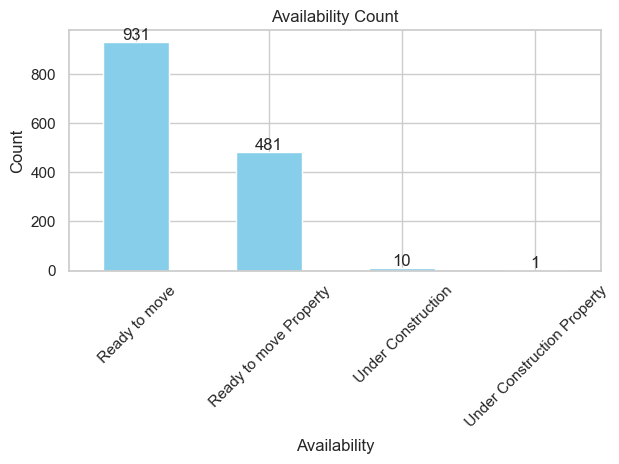

In [333]:
import matplotlib.pyplot as plt

counts = df1['Availability'].value_counts()
ax = counts.plot(kind='bar', color='skyblue')

plt.title('Availability Count')
plt.xlabel('Availability')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Add count labels on top of each bar
for i, v in enumerate(counts.values):
    ax.text(i, v + max(counts.values)*0.01, str(v), ha='center')

plt.show()


In [334]:
df1.Locality.value_counts()

Locality
Navi-Mumbai               329
Thane                     278
Central Mumbai suburbs    197
Mumbai Harbour             99
South Mumbai               91
                         ... 
Gorai 2                     1
Liberty Garden              1
Jawahar Nagar               1
Mitha Nagar                 1
Manish Nagar                1
Name: count, Length: 72, dtype: int64

In [335]:
df1.Locality.value_counts().head(20)

Locality
Navi-Mumbai               329
Thane                     278
Central Mumbai suburbs    197
Mumbai Harbour             99
South Mumbai               91
Mumbai South West          55
Kandivali East             27
Mira Road And Beyond       26
Malad East                 21
Thakur Village             19
Malad West                 19
Borivali West              19
Andheri West               19
Goregaon East              13
Andheri East               13
Mumbai Beyond Thane        13
Kandivali West             12
Versova                    10
Kandarpada                  9
Goregaon West               9
Name: count, dtype: int64

C:\Users\Mayank Gupta\AppData\Local\Temp\ipykernel_10680\619314357.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_localities, y='Locality', x='Count', palette='mako')


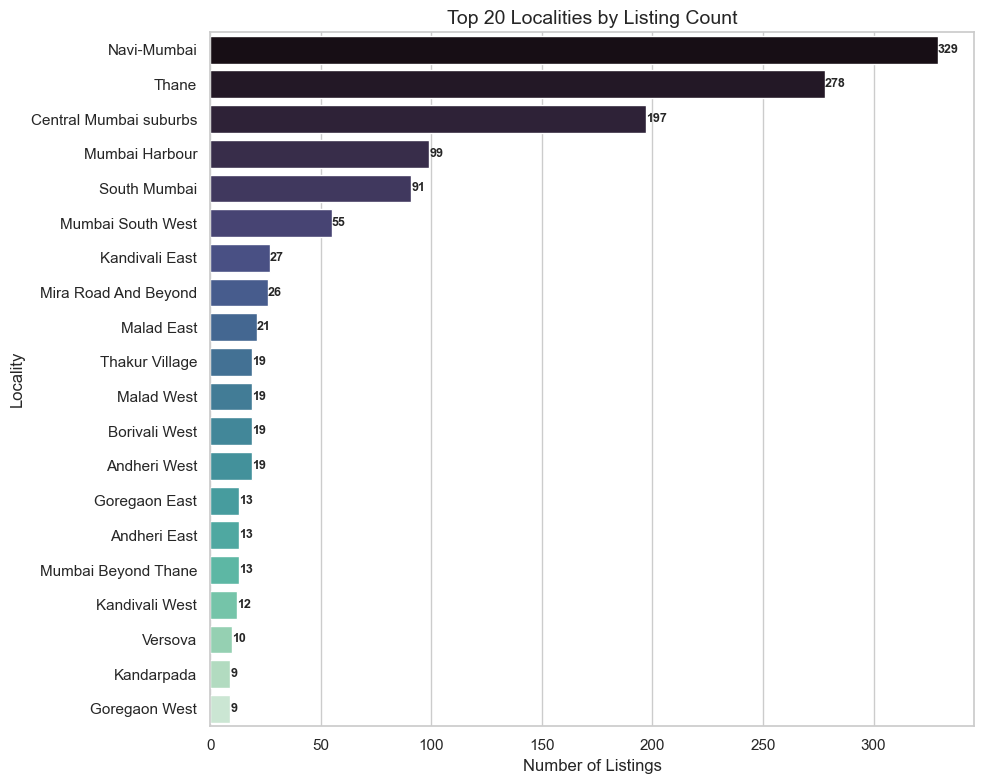

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 20 localities
top_localities = df1['Locality'].value_counts().head(20).reset_index()
top_localities.columns = ['Locality', 'Count']

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=top_localities, y='Locality', x='Count', palette='mako')

# Add count labels to each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, weight='bold')

plt.title('Top 20 Localities by Listing Count', fontsize=14)
plt.xlabel('Number of Listings')
plt.ylabel('Locality')
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Price (₹ Lakhs)')

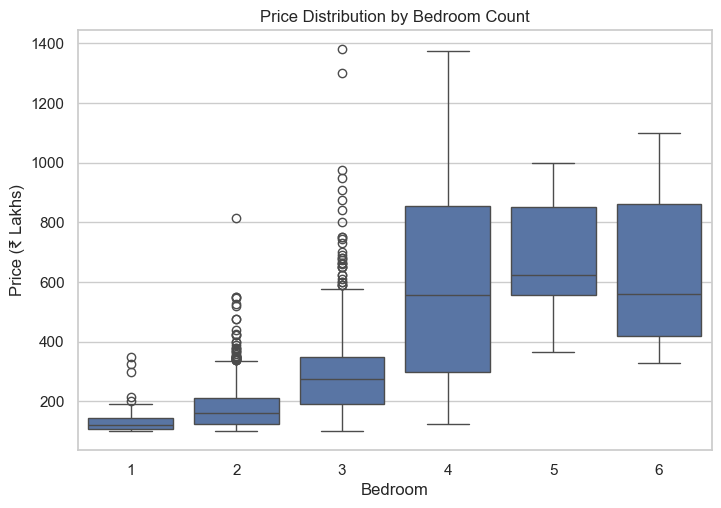

In [337]:
#Price distribution by bedroom count
plt.figure(figsize=(18,12))
plt.subplot(221)
sns.boxplot(data=df1, x='Bedroom', y='Price')
plt.title('Price Distribution by Bedroom Count')
plt.ylabel('Price (₹ Lakhs)')

Text(0, 0.5, 'Price (₹ Lakhs)')

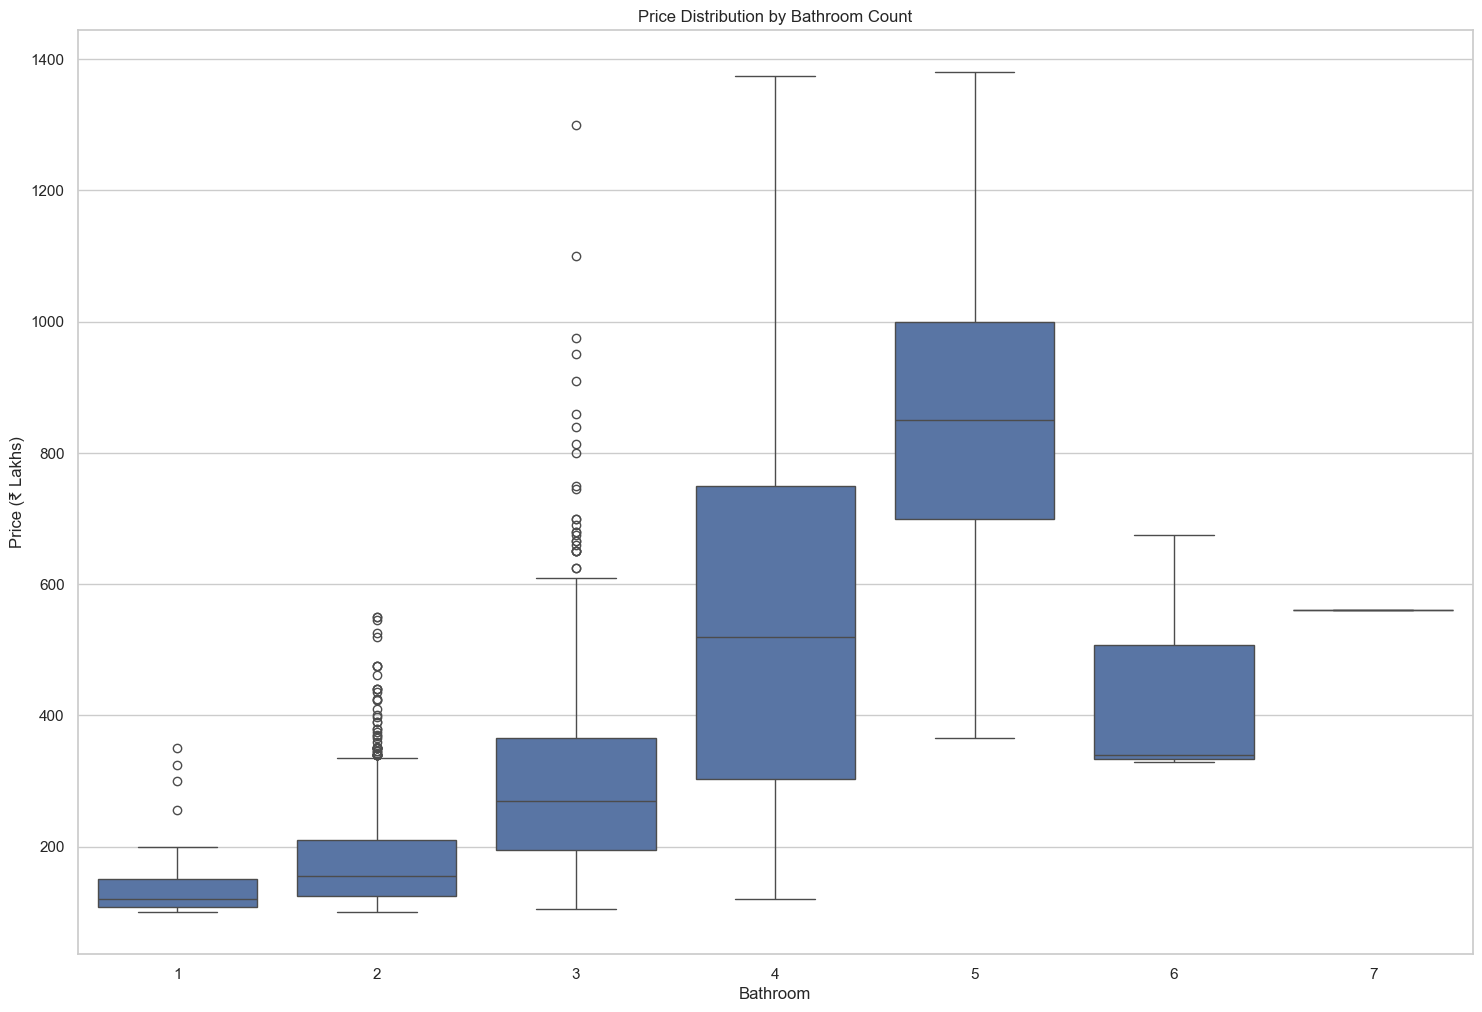

In [338]:
#Price distribution by bathroom count
plt.figure(figsize=(18,12))
sns.boxplot(data=df1, x='Bathroom', y='Price')
plt.title('Price Distribution by Bathroom Count')
plt.ylabel('Price (₹ Lakhs)')

(0.0, 625.0)

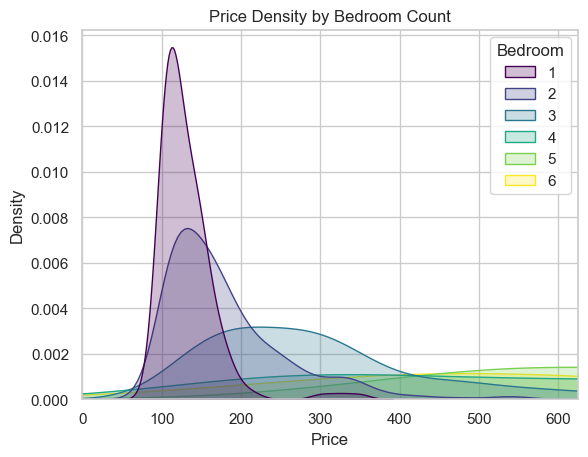

In [339]:
# Price density plot
sns.kdeplot(data=df1, x='Price', hue='Bedroom', 
            palette='viridis', fill=True, common_norm=False)
plt.title('Price Density by Bedroom Count')
plt.xlim(0, mum_prop_clean['Price'].quantile(0.95))  # Exclude extreme right tail

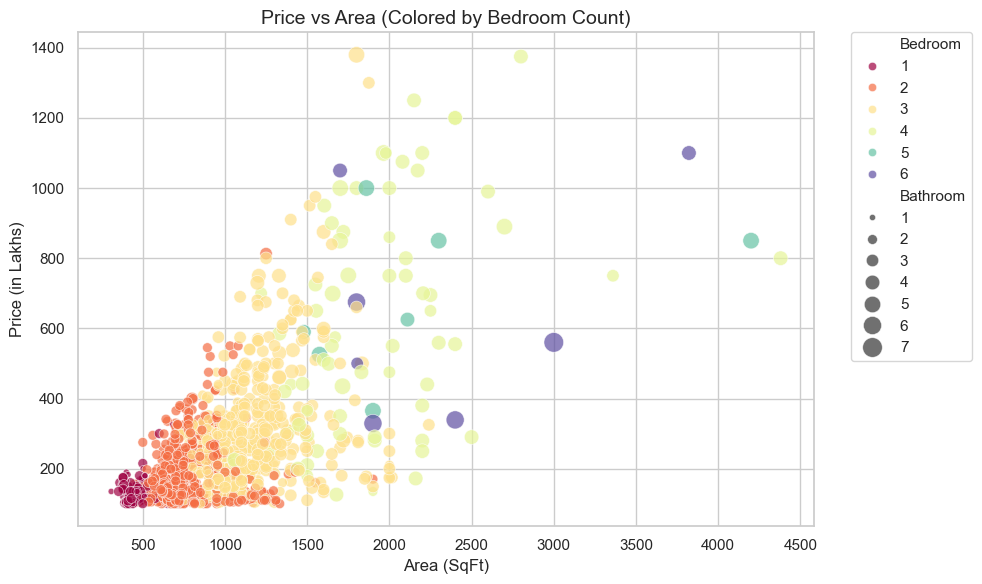

In [340]:
# Price vs Area (By number of bedrooms)
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

scatter = sns.scatterplot(
    data=df1,
    x='Area_SqFt',
    y='Price',
    hue='Bedroom',
    size='Bathroom',
    alpha=0.7,
    palette='Spectral', 
    edgecolor='w',
    linewidth=0.5,
    sizes=(20, 200)
)

plt.title('Price vs Area (Colored by Bedroom Count)', fontsize=14)
plt.xlabel('Area (SqFt)', fontsize=12)
plt.ylabel('Price (in Lakhs)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


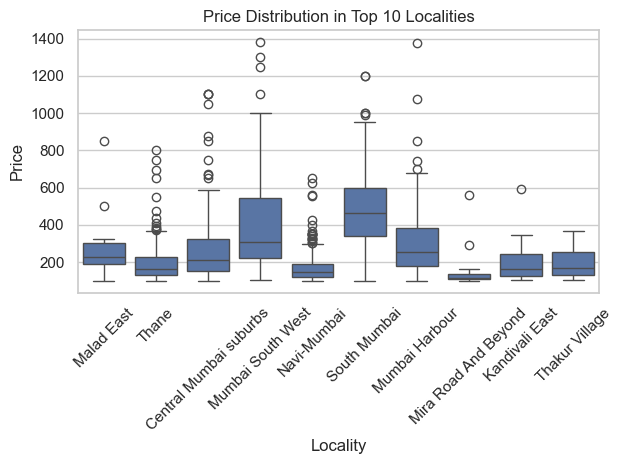

In [341]:
# Price trends by locality (Top 10)
top_localities = df1['Locality'].value_counts().nlargest(10).index
sns.boxplot(data=df1[df1['Locality'].isin(top_localities)], 
            x='Locality', y='Price')
plt.xticks(rotation=45)
plt.title('Price Distribution in Top 10 Localities')
plt.tight_layout()
plt.show()

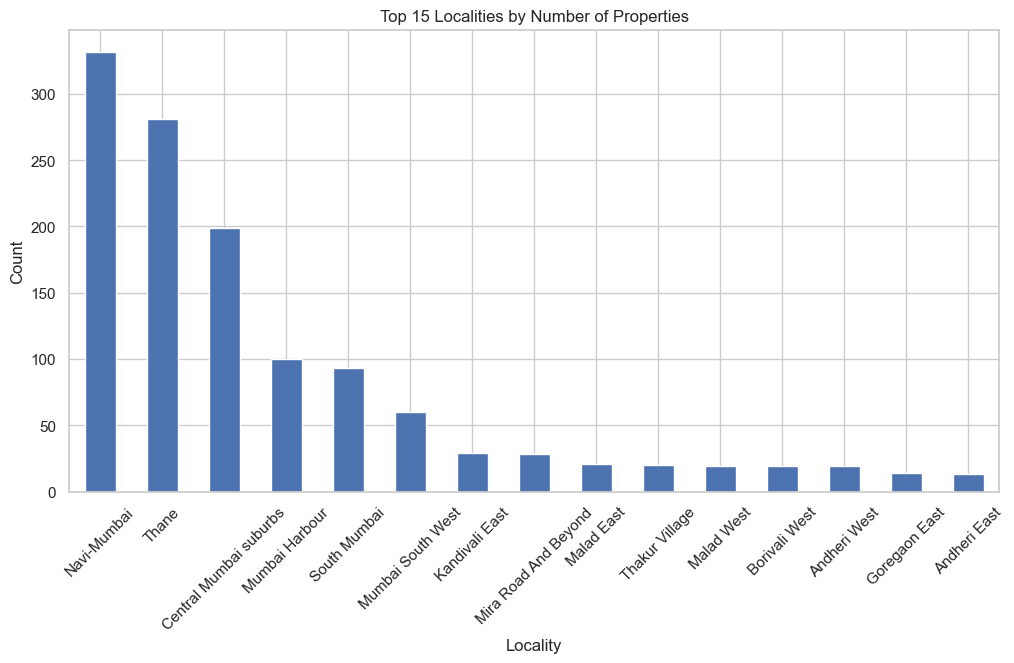

In [342]:
# Top localities by number of properties
top_localities = df['Locality'].value_counts().head(15)
plt.figure(figsize=(12, 6))
top_localities.plot(kind='bar')
plt.title('Top 15 Localities by Number of Properties')
plt.xlabel('Locality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [343]:
# Map property age strings to approximate numeric values (in years)
age_mapping = {
    '0 to 1 Year': 0.5,
    '1 to 5 Years': 3,
    '5 to 10 Years': 7.5,
    '10+ Years': 15,
    'New Property': 0,
    'Ready to Move': np.nan 
}

df1['Property_Age_Num'] = df1['Property_Age'].map(age_mapping)

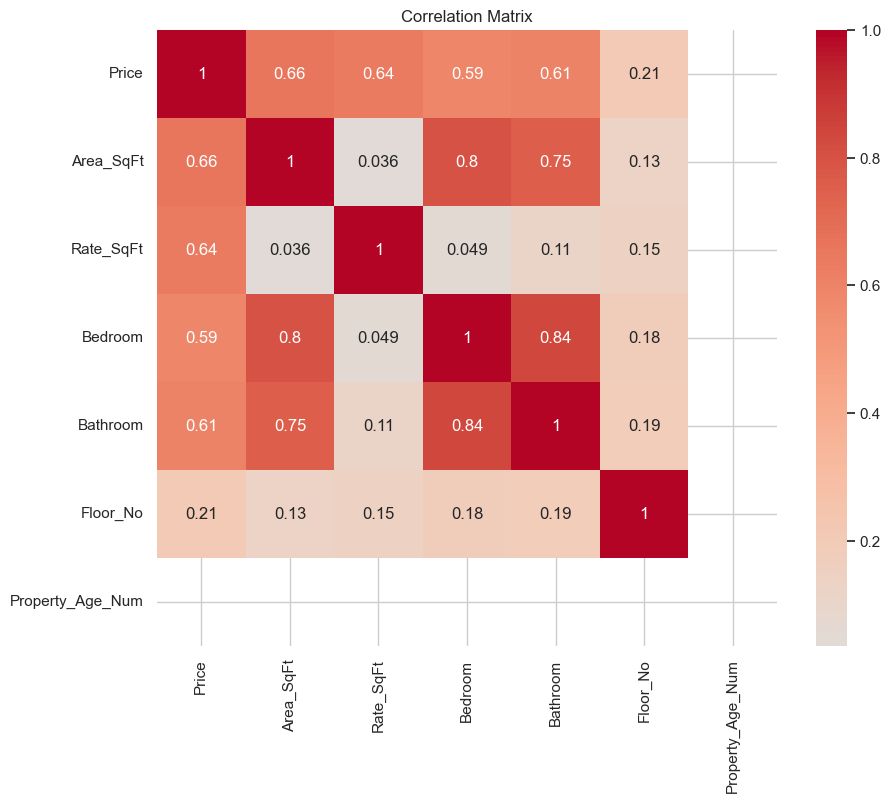

In [344]:
corr_matrix = df1[['Price', 'Area_SqFt', 'Rate_SqFt', 'Bedroom', 'Bathroom', 'Floor_No', 'Property_Age_Num']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

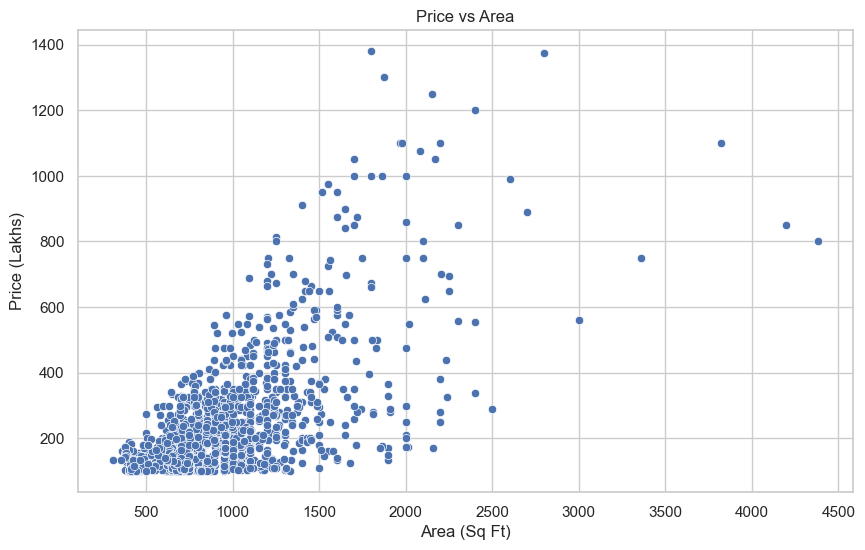

In [345]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area_SqFt', y='Price', data=df1)
plt.title('Price vs Area')
plt.xlabel('Area (Sq Ft)')
plt.ylabel('Price (Lakhs)')
plt.show()

Text(0.5, 1.0, 'Rate/SqFt vs Area Heatmap')

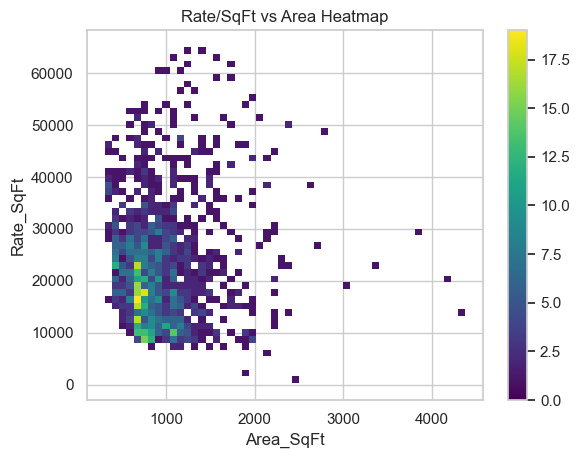

In [346]:
sns.histplot(data=df1, x='Area_SqFt', y='Rate_SqFt', 
             bins=50, cmap='viridis', cbar=True)
plt.title('Rate/SqFt vs Area Heatmap')

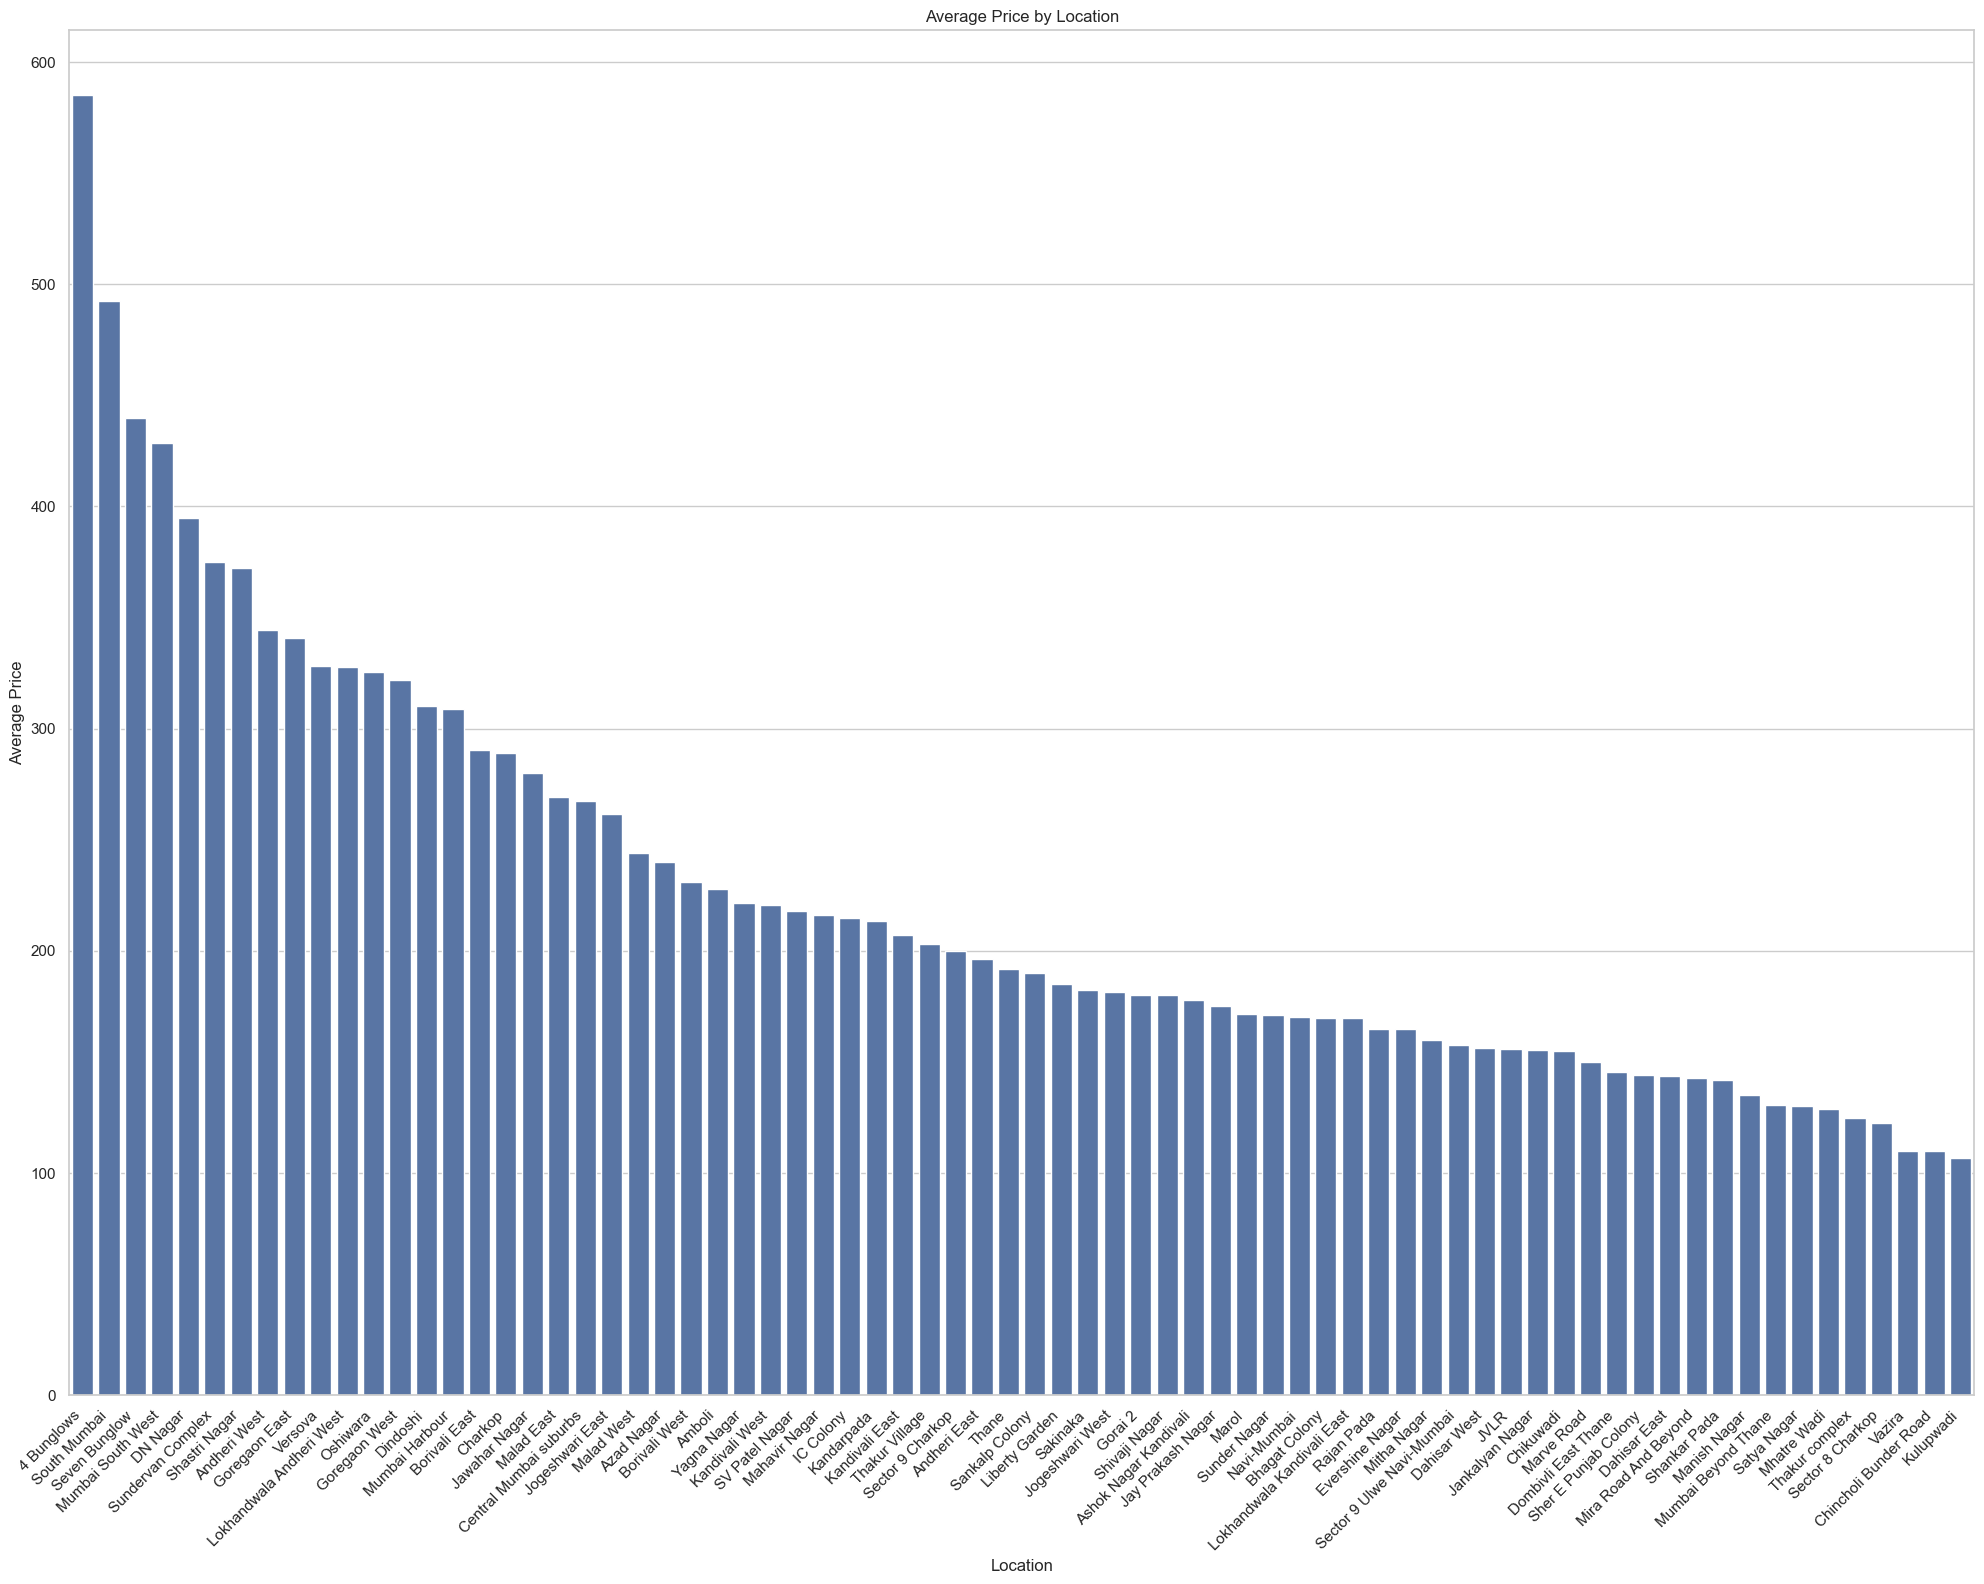

In [347]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

average_price_by_location = df1.groupby('Locality')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 16))
sns.barplot(x=average_price_by_location.index, y=average_price_by_location.values)
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [348]:
df1


,Property_Name,Price,Rate_SqFt,Bedroom,Bathroom,Floor_No,Property_Age,Availability,Area_SqFt,Locality,Property_Age_Num
0,Omkar Alta Monte,500.00,17241.00,3,4,14,0 to 1 Year,Ready to move,1833.00,Malad East,0.50
1,T Bhimjyani Neelkanth Woods,240.00,12631.00,3,3,8,1 to 5 Year,Ready to move Property,1200.00,Thane,NaN
3,Unnamed Property,375.00,25862.00,3,3,1,5 to 10 Year,Ready to move,1450.00,Central Mumbai suburbs,NaN
4,Unnamed Property,350.00,39954.00,2,2,5,5 to 10 Year,Ready to move,876.00,Mumbai South West,NaN
5,Varun Garden,220.00,14666.00,3,3,7,5 to 10 Year,Ready to move,1200.00,Thane,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2570,Satyam Harmony,140.00,13023.00,2,2,18,0 to 1 Year,Ready to move,610.00,Navi-Mumbai,0.50
2575,Balaji Mayuresh Delta,178.00,9569.00,3,3,8,1 to 5 Year,Ready to move,1860.00,Navi-Mumbai,NaN
2576,Shagun White Woods,122.00,10338.00,2,2,2,1 to 5 Year,Ready to move,1180.00,Navi-Mumbai,NaN
2578,Balaji Mayuresh Delta,137.00,10579.00,2,2,6,1 to 5 Year,Ready to move,1295.00,Navi-Mumbai,NaN


In [349]:
df1['Price_Per_SqFt'] = df1['Price'] / df1['Area_SqFt']

In [350]:
# Step 1: Group by Locality and calculate mean Price
locality_avg_price = df1.groupby('Locality')['Price'].mean().to_dict()

# Step 2: Map localities to their mean Price
df1['Locality_Encoded'] = df1['Locality'].map(locality_avg_price) #Target Encoding

In [351]:
df1

,Property_Name,Price,Rate_SqFt,Bedroom,Bathroom,Floor_No,Property_Age,Availability,Area_SqFt,Locality,Property_Age_Num,Price_Per_SqFt,Locality_Encoded
0,Omkar Alta Monte,500.00,17241.00,3,4,14,0 to 1 Year,Ready to move,1833.00,Malad East,0.50,0.27,269.48
1,T Bhimjyani Neelkanth Woods,240.00,12631.00,3,3,8,1 to 5 Year,Ready to move Property,1200.00,Thane,NaN,0.20,191.74
3,Unnamed Property,375.00,25862.00,3,3,1,5 to 10 Year,Ready to move,1450.00,Central Mumbai suburbs,NaN,0.26,267.28
4,Unnamed Property,350.00,39954.00,2,2,5,5 to 10 Year,Ready to move,876.00,Mumbai South West,NaN,0.40,428.47
5,Varun Garden,220.00,14666.00,3,3,7,5 to 10 Year,Ready to move,1200.00,Thane,NaN,0.18,191.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,Satyam Harmony,140.00,13023.00,2,2,18,0 to 1 Year,Ready to move,610.00,Navi-Mumbai,0.50,0.23,170.35
2575,Balaji Mayuresh Delta,178.00,9569.00,3,3,8,1 to 5 Year,Ready to move,1860.00,Navi-Mumbai,NaN,0.10,170.35
2576,Shagun White Woods,122.00,10338.00,2,2,2,1 to 5 Year,Ready to move,1180.00,Navi-Mumbai,NaN,0.10,170.35
2578,Balaji Mayuresh Delta,137.00,10579.00,2,2,6,1 to 5 Year,Ready to move,1295.00,Navi-Mumbai,NaN,0.11,170.35


In [352]:

from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df1[['Area_SqFt', 'Bedroom', 'Bathroom', 'Price_Per_SqFt', 'Locality_Encoded']]
y = df1['Price']

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [353]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE (₹ Lakhs)': mean_absolute_error(y_test, y_pred),
        'R² Score': r2_score(y_test, y_pred)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                   MAE (₹ Lakhs)  R² Score
Linear Regression          32.62      0.93
Random Forest              10.87      0.96


C:\Users\Mayank Gupta\AppData\Local\Temp\ipykernel_10680\4205553376.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['MAE (₹ Lakhs)'], palette='Blues')
C:\Users\Mayank Gupta\AppData\Local\Temp\ipykernel_10680\4205553376.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['R² Score'], palette='Greens')


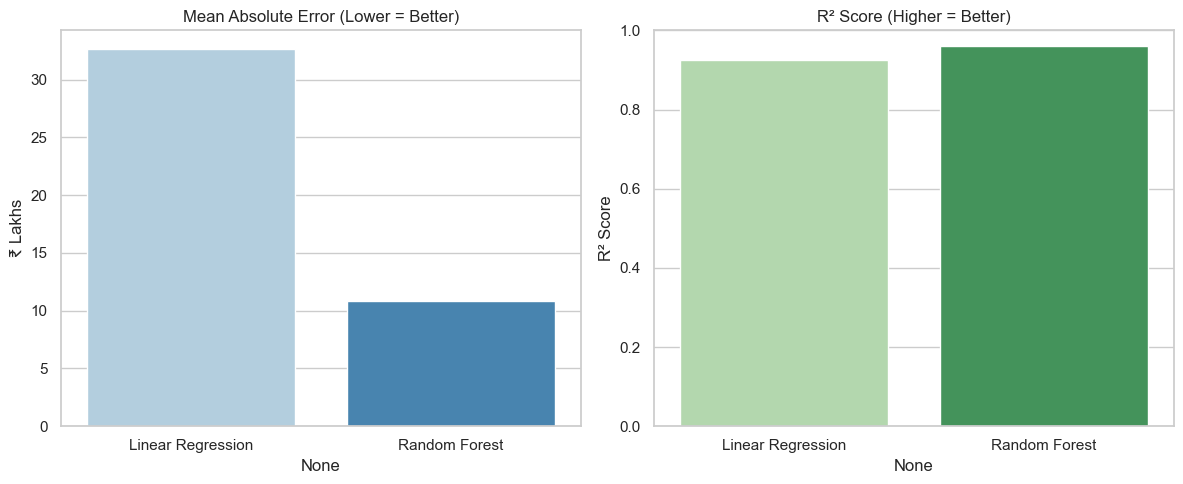

In [354]:

plt.figure(figsize=(12, 5))

# MAE Comparison
plt.subplot(121)
sns.barplot(x=results_df.index, y=results_df['MAE (₹ Lakhs)'], palette='Blues')
plt.title('Mean Absolute Error (Lower = Better)')
plt.ylabel('₹ Lakhs')

# R² Comparison
plt.subplot(122)
sns.barplot(x=results_df.index, y=results_df['R² Score'], palette='Greens')
plt.title('R² Score (Higher = Better)')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

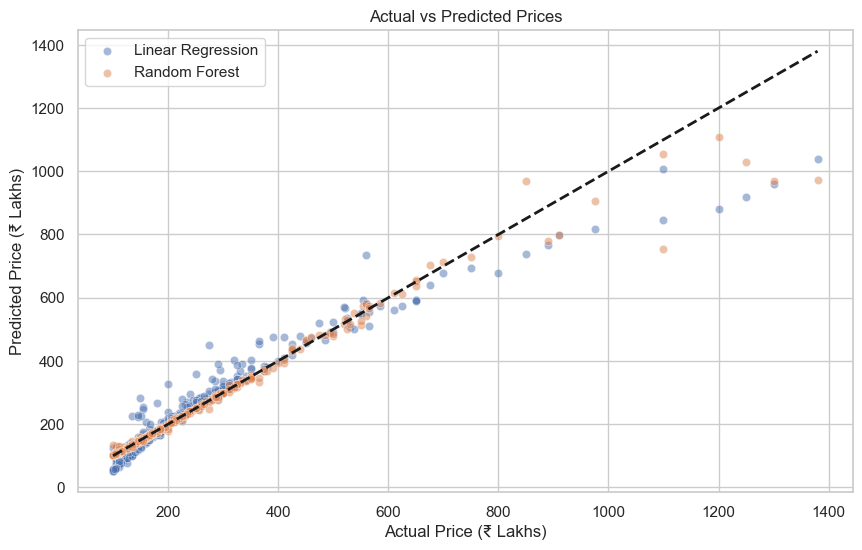

In [355]:
plt.figure(figsize=(10, 6))

# Get predictions from both models
y_pred_lr = models['Linear Regression'].predict(X_test)
y_pred_rf = models['Random Forest'].predict(X_test)

# Plot
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5, label='Linear Regression')
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price (₹ Lakhs)')
plt.ylabel('Predicted Price (₹ Lakhs)')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# 